In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,f1_score, PrecisionRecallDisplay, precision_score, recall_score, roc_auc_score, RocCurveDisplay, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

In [156]:
customer = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagement = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
marketing = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')
transactions = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')

In [157]:
customer.head()

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort


In [158]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   join_date           10000 non-null  object 
 2   last_purchase_date  10000 non-null  object 
 3   age                 8991 non-null   float64
 4   gender              9467 non-null   object 
 5   location            10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [159]:
customer.describe()

,customer_id,age
count,10000.00000,8991.000000
mean,5000.50000,43.467467
std,2886.89568,15.094380
min,1.00000,18.000000
25%,2500.75000,30.000000
50%,5000.50000,44.000000
75%,7500.25000,57.000000
max,10000.00000,69.000000


In [160]:
#fill out missing value to customer's age column with the age mean
customer['age']= customer['age'].fillna(customer['age'].mean())

#change the data type from float to int
customer['age']= customer['age'].astype(int)

In [161]:
#check if missing values are gone
customer.head()

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,43,Male,Hillville
2,3,2021-06-01,2022-11-27,43,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29,Male,Grossstad
4,5,2022-01-24,2023-06-02,43,Male,East Matthewfort


In [162]:
#fill out missing data under gender column
#N/A is defined as Other
def gender_type(x):
    if x == 'Female':
        return 'Female'
    elif x == 'Male':
        return 'Male'
    else:
        return 'Other'

customer['gender'] = customer['gender'].apply(gender_type)

In [163]:
#check if all missing data are gone
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         10000 non-null  int64 
 1   join_date           10000 non-null  object
 2   last_purchase_date  10000 non-null  object
 3   age                 10000 non-null  int32 
 4   gender              10000 non-null  object
 5   location            10000 non-null  object
dtypes: int32(1), int64(1), object(4)
memory usage: 429.8+ KB


In [164]:
engagement.head()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7


In [165]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              10000 non-null  int64
 1   number_of_site_visits    10000 non-null  int64
 2   number_of_emails_opened  10000 non-null  int64
 3   number_of_clicks         10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


In [166]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              10000 non-null  int64
 1   number_of_site_visits    10000 non-null  int64
 2   number_of_emails_opened  10000 non-null  int64
 3   number_of_clicks         10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


In [167]:
engagement.describe()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,100.111900,39.862100,19.725300
std,2886.89568,118.625052,46.511719,22.975083
min,1.00000,1.000000,1.000000,1.000000
25%,2500.75000,15.000000,6.000000,3.000000
50%,5000.50000,53.000000,22.000000,11.000000
75%,7500.25000,141.000000,57.000000,28.000000
max,10000.00000,711.000000,303.000000,142.000000


In [168]:
#investigat if there exist outlier
engagement[engagement['number_of_site_visits'] == 711]

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
4052,4053,711,17,1


In [169]:
marketing.head()

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08


In [170]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_id      129545 non-null  int64  
 1   customer_id         129545 non-null  int64  
 2   transaction_date    129545 non-null  object 
 3   transaction_amount  129545 non-null  float64
 4   product_category    129545 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.9+ MB


In [171]:
transactions.describe()

,transaction_id,customer_id,transaction_amount
count,129545.000000,129545.000000,129545.000000
mean,64773.000000,4998.806237,597.287659
std,37396.564648,2882.049926,491.564174
min,1.000000,1.000000,10.020000
25%,32387.000000,2494.000000,228.320000
50%,64773.000000,5006.000000,438.380000
75%,97159.000000,7476.000000,846.980000
max,129545.000000,10000.000000,1999.990000


In [172]:
customer['join_date'] = pd.to_datetime(customer['join_date'])
customer['last_purchase_date'] = pd.to_datetime(customer['last_purchase_date'])
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
marketing['campaign_date'] = pd.to_datetime(marketing['campaign_date'])

In [173]:
#join table

# split at customer level with # of marketing campaigns customer responded YES and No
# step 1: marketing data at a customer level

marketing_agg_yes = marketing[marketing['response']=='Yes'].groupby('customer_id')['campaign_id'].count().to_frame()

# step 2: aggregate transaction data at a customer level
transactions_agg = transactions.groupby('customer_id').aggregate({'transaction_id':'count','transaction_amount':'sum'})

# step 3: set customers and engagement index as customer_id
customer.set_index('customer_id', inplace=True)
engagement.set_index('customer_id', inplace=True)

# step 4: join all tables
joint_data_yes= customer.join(engagement).join(transactions_agg).join(marketing_agg_yes)

# now have a customer level data set;  you will see some NaN values under campaign_id because some customers haven't been targeted with any marketing campaigns
joint_data_yes = joint_data_yes.reset_index()

In [174]:
joint_data_yes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              10000 non-null  int64         
 1   join_date                10000 non-null  datetime64[ns]
 2   last_purchase_date       10000 non-null  datetime64[ns]
 3   age                      10000 non-null  int32         
 4   gender                   10000 non-null  object        
 5   location                 10000 non-null  object        
 6   number_of_site_visits    10000 non-null  int64         
 7   number_of_emails_opened  10000 non-null  int64         
 8   number_of_clicks         10000 non-null  int64         
 9   transaction_id           10000 non-null  int64         
 10  transaction_amount       10000 non-null  float64       
 11  campaign_id              7665 non-null   float64       
dtypes: datetime64[ns](2), float64(2),

In [175]:
#set missing campaign id as 0 to mark the customer who are not target for campaign
joint_data_yes['campaign_id']= joint_data_yes['campaign_id'].fillna(0)
joint_data_yes = joint_data_yes.drop(columns = ['campaign_id'])

FEATURE ENGINEERING

<Axes: xlabel='transaction_amount', ylabel='Count'>

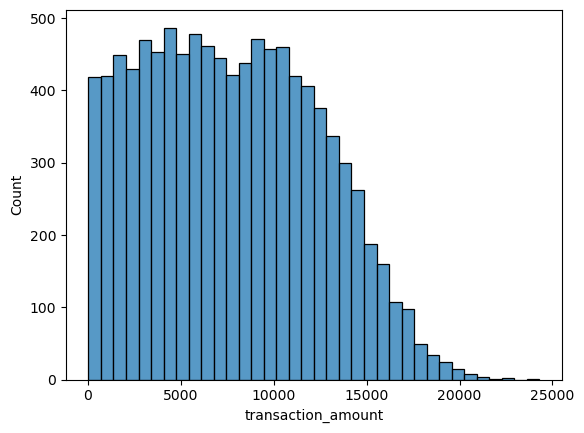

In [176]:
sns.histplot(joint_data_yes['transaction_amount'])

In [177]:
#create a new column named 'average_purchase_value'
joint_data_yes['avg_exp_per_trans'] = joint_data_yes['transaction_amount']/joint_data_yes['transaction_id']
joint_data_yes

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,avg_exp_per_trans
0,1,2023-11-20,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,584.913333
1,2,2021-09-08,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,675.702222
2,3,2021-06-01,2022-11-27,43,Other,North Latoyatown,192,73,25,6,1454.87,242.478333
3,4,2022-01-01,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,393.734000
4,5,2022-01-24,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,646.856250
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42,Female,Johnstonborough,119,47,16,10,5498.20,549.820000
9996,9997,2022-07-09,2023-01-25,26,Male,Jessicamouth,3,33,14,12,5848.30,487.358333
9997,9998,2023-09-17,2024-01-30,39,Male,New John,53,17,5,3,3503.13,1167.710000
9998,9999,2022-05-10,2022-07-15,31,Female,Andrewland,23,5,4,12,6721.86,560.155000


<Axes: xlabel='avg_exp_per_trans', ylabel='Count'>

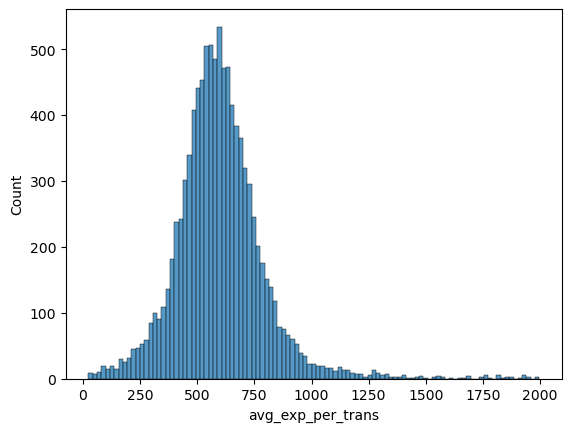

In [178]:
sns.histplot(joint_data_yes['avg_exp_per_trans'])

<Axes: xlabel='customer_lifespan', ylabel='Count'>

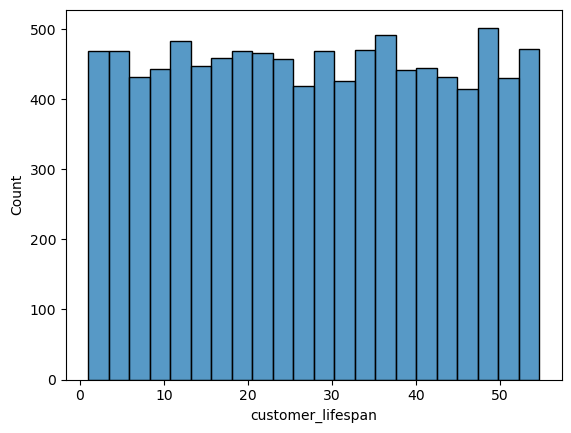

In [179]:
#create column 'customer_lifespan' in month
cutoff = pd.Timestamp('2024-06-30 00:00:00')
joint_data_yes['customer_lifespan'] = ((cutoff - joint_data_yes['join_date']).dt.days / 30).round(2)

sns.histplot(joint_data_yes['customer_lifespan'])

In [180]:
#check if there is zero value in customer_lifespan
joint_data_yes[joint_data_yes['customer_lifespan'] == 0]

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,avg_exp_per_trans,customer_lifespan


In [181]:
#rename to df1
df1 = joint_data_yes

In [182]:
#Customer Lifetime Value = (transaction sum / Customer Lifespan)
#creating lifetime value per year per customer
df1['customer_value'] = df1['transaction_amount']
df1['LTV'] = df1['transaction_amount']/df1['customer_lifespan']
df1

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,avg_exp_per_trans,customer_lifespan,customer_value,LTV
0,1,2023-11-20,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,584.913333,7.43,3509.48,472.339166
1,2,2021-09-08,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,675.702222,34.20,6081.32,177.816374
2,3,2021-06-01,2022-11-27,43,Other,North Latoyatown,192,73,25,6,1454.87,242.478333,37.50,1454.87,38.796533
3,4,2022-01-01,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,393.734000,30.37,7874.68,259.291406
4,5,2022-01-24,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,646.856250,29.60,15524.55,524.478041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42,Female,Johnstonborough,119,47,16,10,5498.20,549.820000,18.73,5498.20,293.550454
9996,9997,2022-07-09,2023-01-25,26,Male,Jessicamouth,3,33,14,12,5848.30,487.358333,24.07,5848.30,242.970503
9997,9998,2023-09-17,2024-01-30,39,Male,New John,53,17,5,3,3503.13,1167.710000,9.57,3503.13,366.053292
9998,9999,2022-05-10,2022-07-15,31,Female,Andrewland,23,5,4,12,6721.86,560.155000,26.07,6721.86,257.838895


In [183]:
#rfm framework
import datetime as dt

# Calculate Recency, Frequency, and Monetary
snapshot_date = pd.Timestamp('2024-06-30 00:00:00')

# Recency in month: Days since last transaction
rfm_recency = df1[['customer_id','last_purchase_date']]
rfm_recency['recency'] = ((snapshot_date - rfm_recency['last_purchase_date']).dt.days/30)


# Frequency: Number of transactions
rfm_frequency = df1[['customer_id','transaction_id']]
rfm_frequency.columns = ['customer_id', 'frequency']
rfm_frequency['frequency'] = df1['transaction_id']

# Monetary: Total amount spent
rfm_monetary = df1[['customer_id','LTV']]
rfm_monetary.columns = ['customer_id', 'LTV']

# Merge RFM metrics into a single DataFrame
rfm = rfm_recency.merge(rfm_frequency, on='customer_id').merge(rfm_monetary, on='customer_id')

rfm.head()

C:\Users\User\AppData\Local\Temp\ipykernel_45364\2176911768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_recency['recency'] = ((snapshot_date - rfm_recency['last_purchase_date']).dt.days/30)
C:\Users\User\AppData\Local\Temp\ipykernel_45364\2176911768.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_frequency['frequency'] = df1['transaction_id']


,customer_id,last_purchase_date,recency,frequency,LTV
0,1,2024-03-17,3.500000,6,472.339166
1,2,2023-10-25,8.300000,9,177.816374
2,3,2022-11-27,19.366667,6,38.796533
3,4,2022-09-01,22.266667,20,259.291406
4,5,2023-06-02,13.133333,24,524.478041


In [184]:
# Define quantiles
quantiles = rfm[['recency', 'frequency', 'LTV']].quantile([0.33,0.66]).to_dict()

# Function to calculate R score
def fm_score(x, p, d):
    if x <= d[p][0.33]:
        return 1
    elif x <= d[p][0.66]:
        return 2
    else:
        return 3

# Function to calculate F and M scores
def r_score(x, p, d):
    if x <= d[p][0.33]:
        return 3
    elif x <= d[p][0.66]:
        return 2
    else:
        return 1

# Calculate R, F, M scores
rfm['R'] = rfm['recency'].apply(r_score, args=('recency', quantiles))
rfm['F'] = rfm['frequency'].apply(fm_score, args=('frequency', quantiles))
rfm['M'] = rfm['LTV'].apply(fm_score, args=('LTV', quantiles))

# Combine R, F, M scores into a single RFM score
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']

# Define a threshold for high and low value customers
threshold = 5

# Assign High and Low classes based on the threshold
rfm['output'] = rfm['RFM_Score'].apply(lambda x: 'Low' if x <= threshold else 'High')

rfm

,customer_id,last_purchase_date,recency,frequency,LTV,R,F,M,RFM_Score,output
0,1,2024-03-17,3.500000,6,472.339166,3,1,3,7,High
1,2,2023-10-25,8.300000,9,177.816374,2,1,1,4,Low
2,3,2022-11-27,19.366667,6,38.796533,1,1,1,3,Low
3,4,2022-09-01,22.266667,20,259.291406,1,3,2,6,High
4,5,2023-06-02,13.133333,24,524.478041,2,3,3,8,High
...,...,...,...,...,...,...,...,...,...,...
9995,9996,2023-08-13,10.733333,10,293.550454,2,2,2,6,High
9996,9997,2023-01-25,17.400000,12,242.970503,1,2,2,5,Low
9997,9998,2024-01-30,5.066667,3,366.053292,3,1,2,6,High
9998,9999,2022-07-15,23.866667,12,257.838895,1,2,2,5,Low


In [185]:
df2 = df1.merge(rfm[['customer_id','output']], on='customer_id', how='left')
df2['output'] = rfm['output'].apply(lambda x: 0 if x =='Low' else 1)
#0 = low, 1 = high
df2

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,avg_exp_per_trans,customer_lifespan,customer_value,LTV,output
0,1,2023-11-20,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,584.913333,7.43,3509.48,472.339166,1
1,2,2021-09-08,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,675.702222,34.20,6081.32,177.816374,0
2,3,2021-06-01,2022-11-27,43,Other,North Latoyatown,192,73,25,6,1454.87,242.478333,37.50,1454.87,38.796533,0
3,4,2022-01-01,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,393.734000,30.37,7874.68,259.291406,1
4,5,2022-01-24,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,646.856250,29.60,15524.55,524.478041,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42,Female,Johnstonborough,119,47,16,10,5498.20,549.820000,18.73,5498.20,293.550454,1
9996,9997,2022-07-09,2023-01-25,26,Male,Jessicamouth,3,33,14,12,5848.30,487.358333,24.07,5848.30,242.970503,0
9997,9998,2023-09-17,2024-01-30,39,Male,New John,53,17,5,3,3503.13,1167.710000,9.57,3503.13,366.053292,1
9998,9999,2022-05-10,2022-07-15,31,Female,Andrewland,23,5,4,12,6721.86,560.155000,26.07,6721.86,257.838895,0


In [186]:
#Engagement level feature engineering
#create a column to get frequency on the customer's enegement level
engagement.reset_index()
df2['avg_email_click'] = (df2['number_of_clicks']/df2['number_of_emails_opened']).round(2)
df2['link_click_rate'] = (df2['number_of_clicks']/df2['number_of_site_visits']).round(2)
df2['LT_site_visit'] = (df2['number_of_site_visits']/df2['customer_lifespan']).round(2)

In [187]:
#marketing level of feature engineering
# Step 1: Count the number of "YES" responses for each customer
yes_responses = marketing[marketing['response'] == 'Yes'].groupby('customer_id').size().reset_index(name='yes_response_count')

# Step 2: Count the total number of campaigns received by each customer
total_campaigns = marketing.groupby('customer_id').size().reset_index(name='total_campaigns')

# Step 3: Merge the two dataframes and calculate the response rate
response_rate = yes_responses.merge(total_campaigns, on='customer_id', how='right')
response_rate['yes_response_count'].fillna(0, inplace=True)  # Fill NaN values with 0
response_rate['response_rate'] = response_rate['yes_response_count'] / response_rate['total_campaigns']

In [188]:
df3 = df2.merge(response_rate, on='customer_id', how='left').drop(columns=['yes_response_count','total_campaigns'])
df3

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,avg_exp_per_trans,customer_lifespan,customer_value,LTV,output,avg_email_click,link_click_rate,LT_site_visit,response_rate
0,1,2023-11-20,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,584.913333,7.43,3509.48,472.339166,1,0.07,0.10,1.35,0.25
1,2,2021-09-08,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,675.702222,34.20,6081.32,177.816374,0,1.04,0.18,8.33,0.50
2,3,2021-06-01,2022-11-27,43,Other,North Latoyatown,192,73,25,6,1454.87,242.478333,37.50,1454.87,38.796533,0,0.34,0.13,5.12,0.50
3,4,2022-01-01,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,393.734000,30.37,7874.68,259.291406,1,0.57,0.15,3.62,0.25
4,5,2022-01-24,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,646.856250,29.60,15524.55,524.478041,1,3.50,0.04,5.44,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42,Female,Johnstonborough,119,47,16,10,5498.20,549.820000,18.73,5498.20,293.550454,1,0.34,0.13,6.35,0.00
9996,9997,2022-07-09,2023-01-25,26,Male,Jessicamouth,3,33,14,12,5848.30,487.358333,24.07,5848.30,242.970503,0,0.42,4.67,0.12,1.00
9997,9998,2023-09-17,2024-01-30,39,Male,New John,53,17,5,3,3503.13,1167.710000,9.57,3503.13,366.053292,1,0.29,0.09,5.54,1.00
9998,9999,2022-05-10,2022-07-15,31,Female,Andrewland,23,5,4,12,6721.86,560.155000,26.07,6721.86,257.838895,0,0.80,0.17,0.88,0.00


In [189]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

#label encode categorical data
le = LabelEncoder()
df3['gender']=le.fit_transform(df3['gender']).astype(int)
df3['location']=le.fit_transform(df3['location']).astype(int)
df3

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,avg_exp_per_trans,customer_lifespan,customer_value,LTV,output,avg_email_click,link_click_rate,LT_site_visit,response_rate
0,1,2023-11-20,2024-03-17,56,0,4747,10,15,1,6,3509.48,584.913333,7.43,3509.48,472.339166,1,0.07,0.10,1.35,0.25
1,2,2021-09-08,2023-10-25,43,1,2074,285,49,51,9,6081.32,675.702222,34.20,6081.32,177.816374,0,1.04,0.18,8.33,0.50
2,3,2021-06-01,2022-11-27,43,2,4613,192,73,25,6,1454.87,242.478333,37.50,1454.87,38.796533,0,0.34,0.13,5.12,0.50
3,4,2022-01-01,2022-09-01,29,1,1916,110,30,17,20,7874.68,393.734000,30.37,7874.68,259.291406,1,0.57,0.15,3.62,0.25
4,5,2022-01-24,2023-06-02,43,1,1433,161,2,7,24,15524.55,646.856250,29.60,15524.55,524.478041,1,3.50,0.04,5.44,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42,0,2384,119,47,16,10,5498.20,549.820000,18.73,5498.20,293.550454,1,0.34,0.13,6.35,0.00
9996,9997,2022-07-09,2023-01-25,26,1,2315,3,33,14,12,5848.30,487.358333,24.07,5848.30,242.970503,0,0.42,4.67,0.12,1.00
9997,9998,2023-09-17,2024-01-30,39,1,4017,53,17,5,3,3503.13,1167.710000,9.57,3503.13,366.053292,1,0.29,0.09,5.54,1.00
9998,9999,2022-05-10,2022-07-15,31,0,158,23,5,4,12,6721.86,560.155000,26.07,6721.86,257.838895,0,0.80,0.17,0.88,0.00


In [190]:
final_df = df3.drop(columns = ['customer_id','join_date','last_purchase_date','location','number_of_site_visits','number_of_emails_opened','number_of_clicks','transaction_id','transaction_amount','customer_lifespan','customer_value',])
final_df

,age,gender,avg_exp_per_trans,LTV,output,avg_email_click,link_click_rate,LT_site_visit,response_rate
0,56,0,584.913333,472.339166,1,0.07,0.10,1.35,0.25
1,43,1,675.702222,177.816374,0,1.04,0.18,8.33,0.50
2,43,2,242.478333,38.796533,0,0.34,0.13,5.12,0.50
3,29,1,393.734000,259.291406,1,0.57,0.15,3.62,0.25
4,43,1,646.856250,524.478041,1,3.50,0.04,5.44,0.00
...,...,...,...,...,...,...,...,...,...
9995,42,0,549.820000,293.550454,1,0.34,0.13,6.35,0.00
9996,26,1,487.358333,242.970503,0,0.42,4.67,0.12,1.00
9997,39,1,1167.710000,366.053292,1,0.29,0.09,5.54,1.00
9998,31,0,560.155000,257.838895,0,0.80,0.17,0.88,0.00


<Axes: xlabel='LTV', ylabel='Count'>

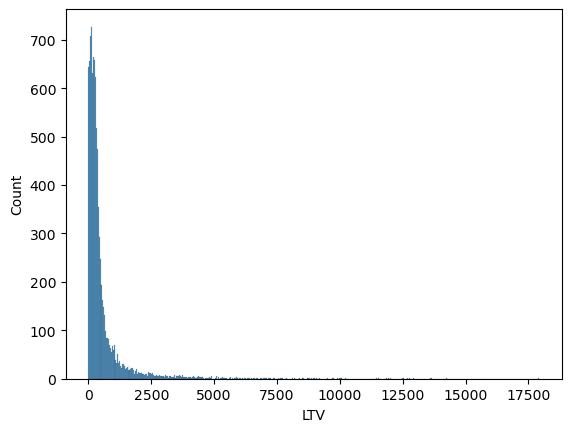

In [191]:
sns.histplot(final_df['LTV'])

Modeling

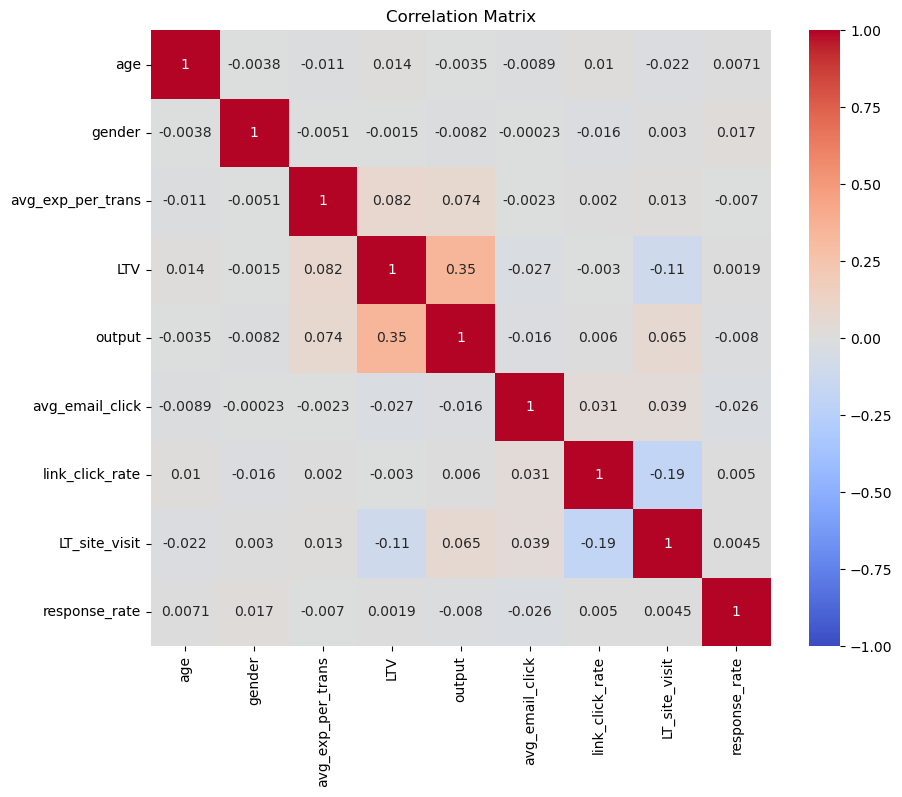

In [192]:
# Compute the correlation matrix
correlation_matrix = final_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='output', ylabel='Count'>

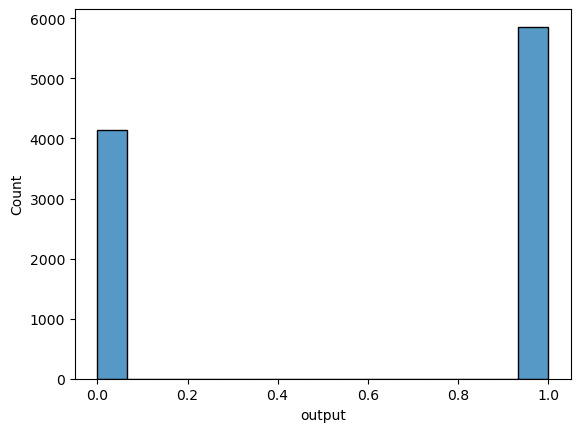

In [193]:
sns.histplot(final_df['output'])

In [194]:
final_df.groupby('output')['output'].count()/len(final_df)

output
0    0.4139
1    0.5861
Name: output, dtype: float64

In [195]:
X = final_df.drop(columns=['output'])

y = final_df['output']

In [196]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, PrecisionRecallDisplay, precision_score, recall_score, roc_auc_score, RocCurveDisplay, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [198]:
# Standardize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier()
log = LogisticRegression()

In [199]:
# Cross-validation to determine which model works best
scores_log = cross_val_score(log, X_train, y_train, scoring='f1', cv=5)
scores_knn = cross_val_score(knn, X_train, y_train, scoring='f1', cv=5)

print(f'Cross-Validated Scores for Logistic Regression:{scores_log}')
print(f'Cross-Validated Scores for K Nearest Neighbor:{scores_knn}')

#calculate average score
print(f'Logistic Regression Mean F1 Score: {np.mean(scores_log)}')
print(f'K Nearest Neighbor Mean F1 Score: {np.mean(scores_knn)}')

Cross-Validated Scores for Logistic Regression:[0.85057471 0.83021011 0.84029765 0.85895222 0.86609687]
Cross-Validated Scores for K Nearest Neighbor:[0.71019473 0.70574972 0.70989761 0.70742857 0.72146119]
Logistic Regression Mean F1 Score: 0.8492263112437181
K Nearest Neighbor Mean F1 Score: 0.7109463637058087


In [200]:
#building an actual model

KNN = knn.fit(X_train, y_train)
LOG = log.fit(X_train, y_train)

#prediction y
y_pred_log = LOG.predict(X_test)
y_proba_log = LOG.predict_proba(X_test)[:, 1]

y_pred_knn=KNN.predict(X_test)
y_proba_knn = KNN.predict_proba(X_test)[:, 1]

In [201]:
from sklearn.metrics import accuracy_score

# Logreg score
print(accuracy_score(y_test, y_pred_log))
print(precision_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(recall_score(y_test, y_pred_log))


0.8143333333333334
0.8078893442622951
0.849905685798976
0.8965321205230244


In [202]:
#knn score
print(accuracy_score(y_test,y_pred_knn))
print(precision_score(y_test,y_pred_knn))
print(f1_score(y_test,y_pred_knn))
print(recall_score(y_test, y_pred_knn))

0.6483333333333333
0.68014329580348
0.7158631834096417
0.755542922114838


Model Evaluation

Logistic Regression ROC-AUC Score: 0.9101267614602282
KNN ROC-AUC Score: 0.6914945080417552


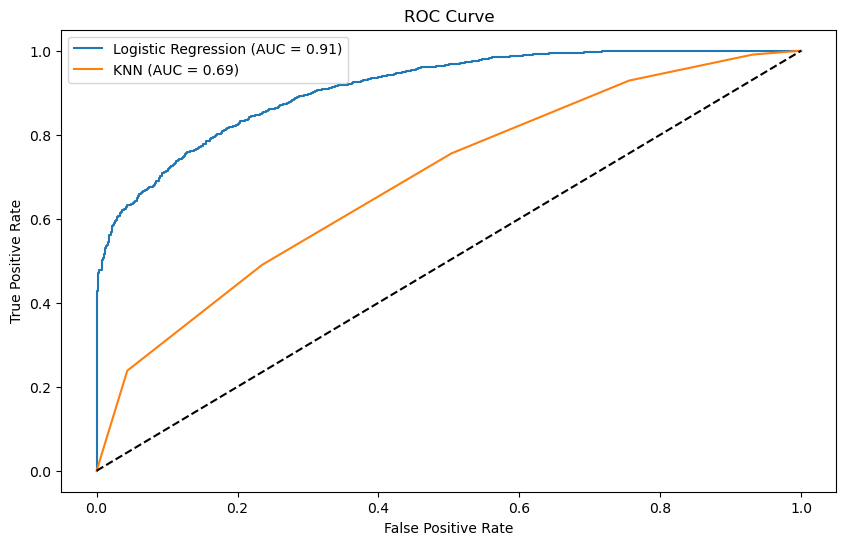

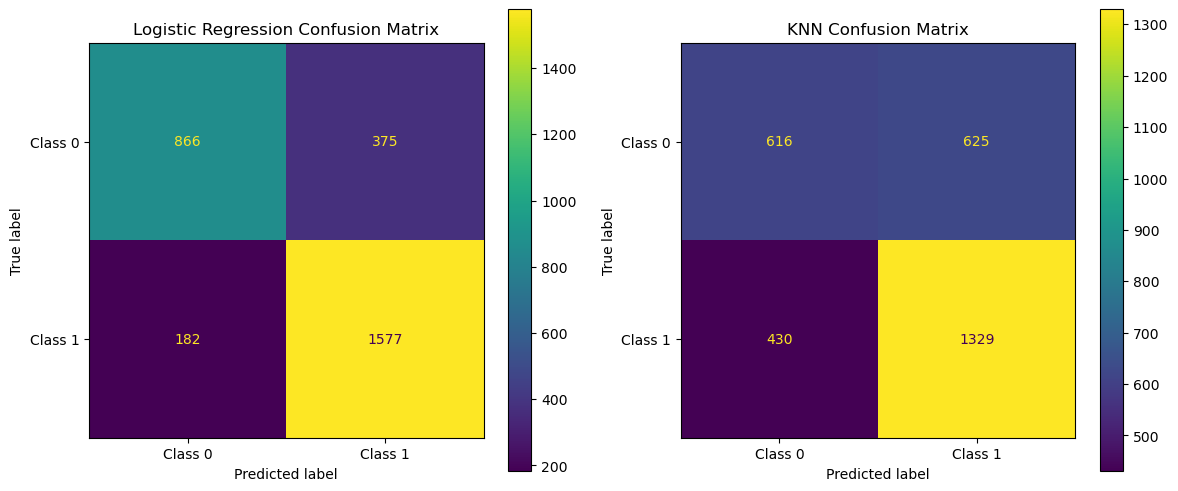

In [203]:
#Compute ROC-AUC Scores
roc_auc_log = roc_auc_score(y_test, y_proba_log)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)

print("Logistic Regression ROC-AUC Score:", roc_auc_log)
print("KNN ROC-AUC Score:", roc_auc_knn)

# Step 3: Plot ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Step 4: Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
cm_knn = confusion_matrix(y_test, y_pred_knn)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ConfusionMatrixDisplay(cm_log, display_labels=["Class 0", "Class 1"]).plot(ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')

ConfusionMatrixDisplay(cm_knn, display_labels=["Class 0", "Class 1"]).plot(ax=ax[1])
ax[1].set_title('KNN Confusion Matrix')

plt.show()


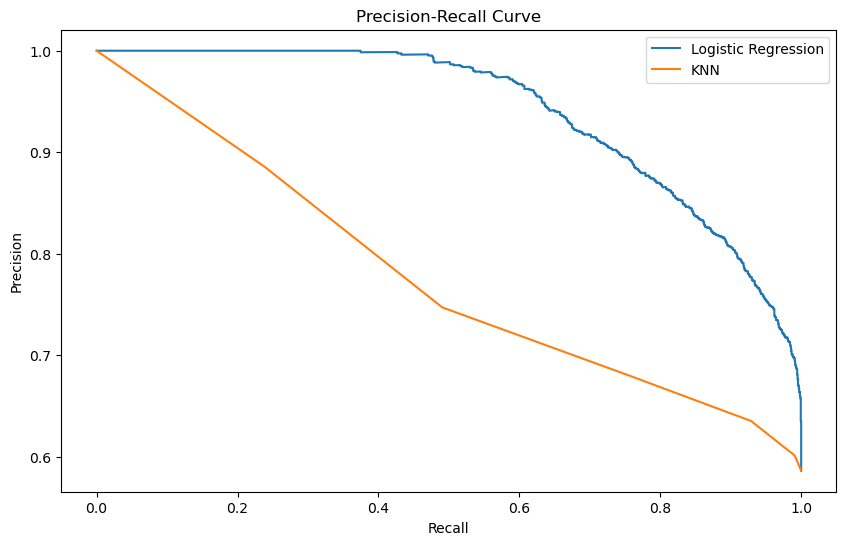

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1241
           1       0.81      0.90      0.85      1759

    accuracy                           0.81      3000
   macro avg       0.82      0.80      0.80      3000
weighted avg       0.82      0.81      0.81      3000

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54      1241
           1       0.68      0.76      0.72      1759

    accuracy                           0.65      3000
   macro avg       0.63      0.63      0.63      3000
weighted avg       0.64      0.65      0.64      3000



In [204]:
# Step 5: Plot Precision-Recall Curves
prec_log, rec_log, _ = precision_recall_curve(y_test, y_proba_log)
prec_knn, rec_knn, _ = precision_recall_curve(y_test, y_proba_knn)

plt.figure(figsize=(10, 6))
plt.plot(rec_log, prec_log, label=f'Logistic Regression')
plt.plot(rec_knn, prec_knn, label=f'KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Step 6: Detailed Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))